<a href="https://colab.research.google.com/github/varjiliyas/6Companies30days/blob/main/Road_Accident_Severity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import joblib
from PIL import Image
import PIL

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [76]:
df = pd.read_csv('/content/RTA Dataset.csv')

In [77]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [78]:
df.shape

(12316, 32)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [80]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64


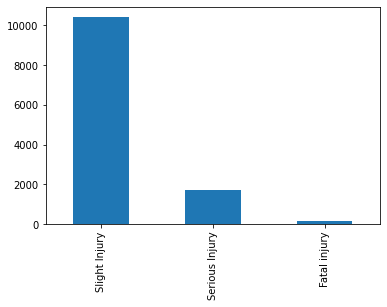

In [81]:
# target variable classes counts and bar plot
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

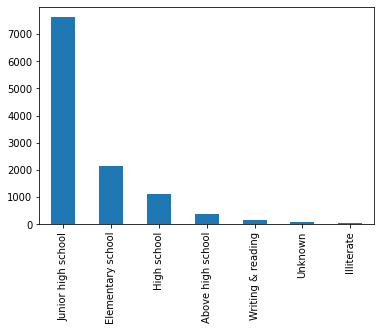

In [82]:
#Education lavel of drivers
df['Educational_level'].value_counts().plot(kind='bar')

<Figure size 432x360 with 0 Axes>

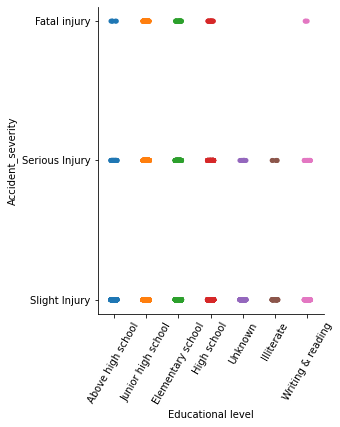

In [83]:
# plot a point plot for categorical features and target variable
plt.figure(figsize=(6,5))
sns.catplot(x='Educational_level', y='Accident_severity', data=df)
plt.xlabel("Educational level")
plt.xticks(rotation=60)
plt.show()

In [84]:
#Visualizing datasets using dabl(data analysis baseline library)
!pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import dabl

#dabl data analysis

Target looks like classification


AttributeError: ignored

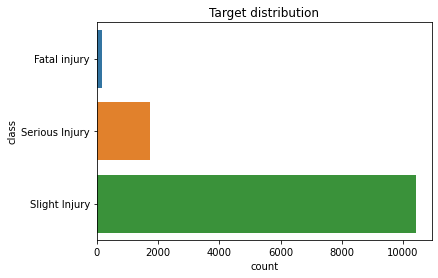

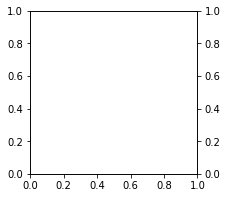

In [86]:
dabl.plot(df, target_col='Accident_severity')

In [87]:
df.corr()

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


# Some Insights from the Initial Data Analysis:

More the Number of casualties, higher the chances of fatal injuries at accident site

More the vehicles involved higher the chances of Serious injury

Light_conditions being darkness can cause higher serious injury

data is highly imbalanced

Features like (area_accident_occured, Cause_of_accident, Day_of_week, 

type_of_junction) seem to be imporatant features causing fatal injuries

Road_surface and road conditions do not affect fatal or serious accidents apparently

# plot the bar plot of road_surface_type and accident severity feature

Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: Road_surface_type, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

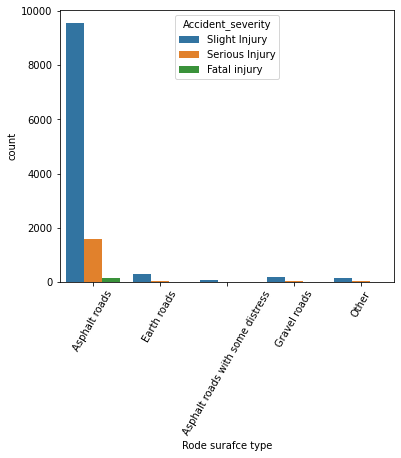

In [88]:
print(df['Road_surface_type'].value_counts())
plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)
plt.show

Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: Road_surface_conditions, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

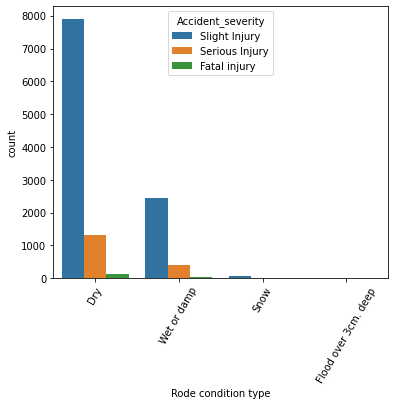

In [89]:
print(df['Road_surface_conditions'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_conditions', hue='Accident_severity', data=df)
plt.xlabel('Rode condition type')
plt.xticks(rotation=60)
plt.show

# **How does road_surface affact injuries?**

In [90]:
pivot_df = pd.pivot_table(data=df,index='Road_surface_conditions',columns='Accident_severity',aggfunc='count')

fatal_df = pivot_df['Road_surface_type']
fatal_df.fillna(0, inplace=True)
fatal_df['sum_of_injuries'] = fatal_df['Fatal injury'] + fatal_df['Serious Injury'] + fatal_df['Slight Injury']
fatal_df


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accident_severity,Fatal injury,Serious Injury,Slight Injury,sum_of_injuries
Road_surface_conditions,,,,
Dry,121.0,1312.0,7774.0,9207.0
Flood over 3cm. deep,0.0,0.0,2.0,2.0
Snow,0.0,4.0,65.0,69.0
Wet or damp,36.0,404.0,2426.0,2866.0


In [91]:
fatal_df_dry = (fatal_df.loc['Dry']/fatal_df.loc['Dry','sum_of_injuries'])*100
fatal_df_dry

Accident_severity
Fatal injury         1.314217
Serious Injury      14.250027
Slight Injury       84.435755
sum_of_injuries    100.000000
Name: Dry, dtype: float64

In [92]:
fatal_df_snow = (fatal_df.loc['Wet or damp']/fatal_df.loc['Wet or damp','sum_of_injuries'])*100
fatal_df_snow

Accident_severity
Fatal injury         1.256106
Serious Injury      14.096301
Slight Injury       84.647592
sum_of_injuries    100.000000
Name: Wet or damp, dtype: float64

In [93]:
df.groupby('Road_surface_conditions')['Accident_severity'].count()

Road_surface_conditions
Dry                     9340
Flood over 3cm. deep       2
Snow                      70
Wet or damp             2904
Name: Accident_severity, dtype: int64

# Converting object type column to DateTime Datatype column

In [94]:
df['Time'] = pd.to_datetime(df['Time'])

In [95]:
obj_cols = [col for col in df.columns if df[col].dtypes == 'object']
obj_cols2 = [col for col in obj_cols if col != 'Accident_severity']
obj_cols2

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident']

Data Pre-Processing

# Extrating 'Hour_of_Day' feature from the time feature

In [96]:
# remove time column from datafram
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


# categorical data visualization

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open

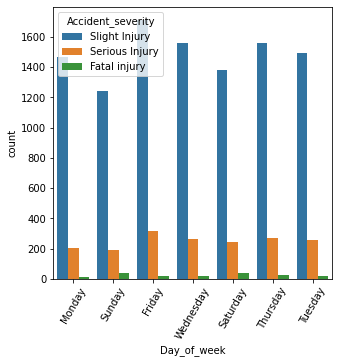

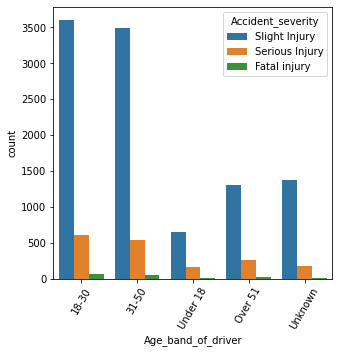

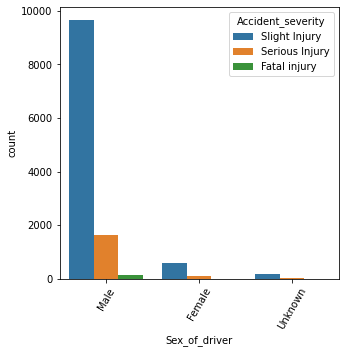

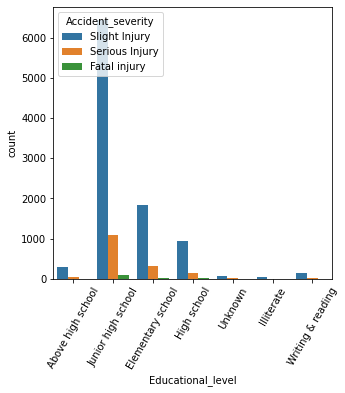

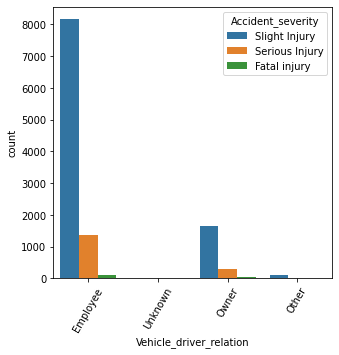

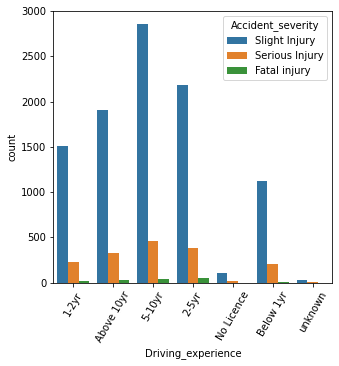

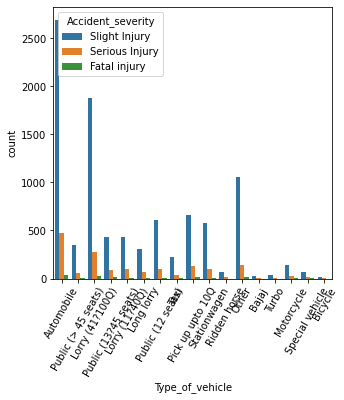

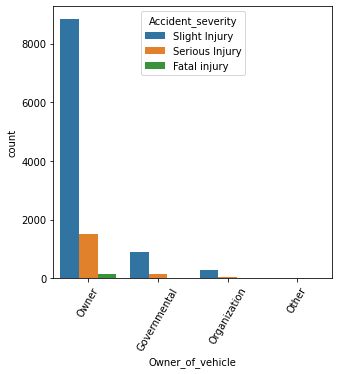

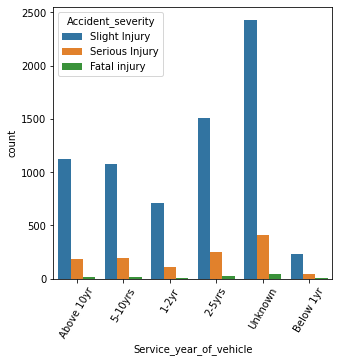

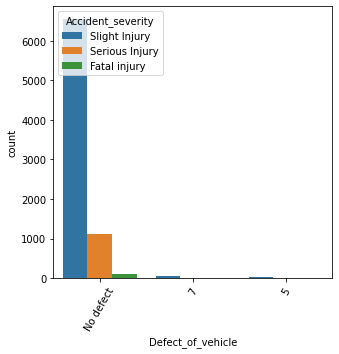

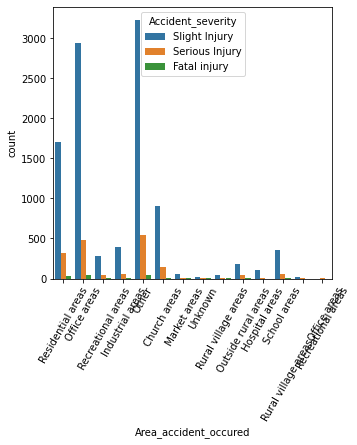

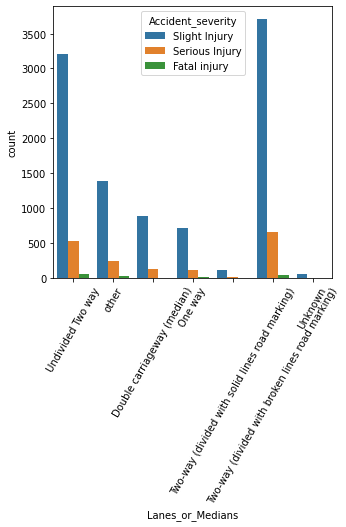

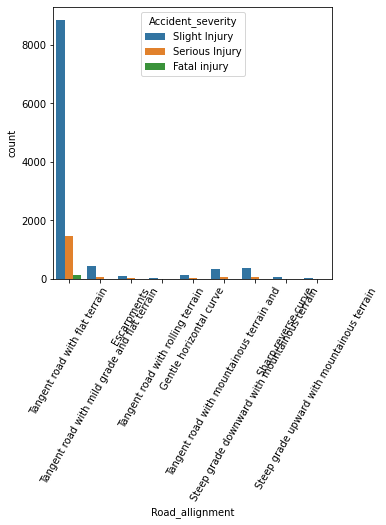

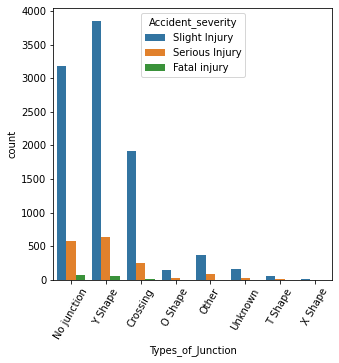

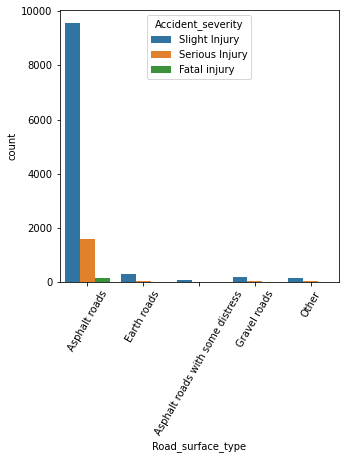

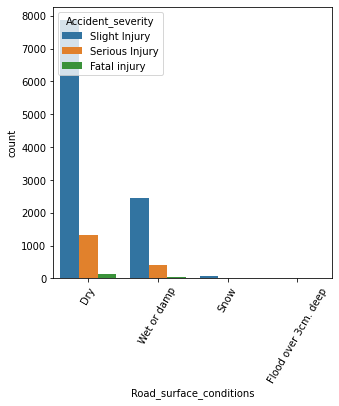

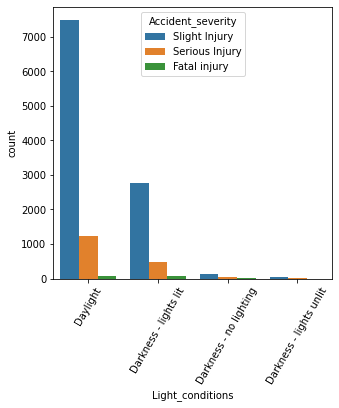

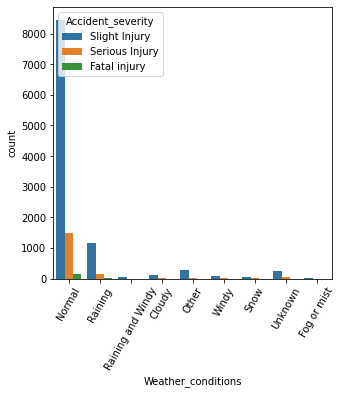

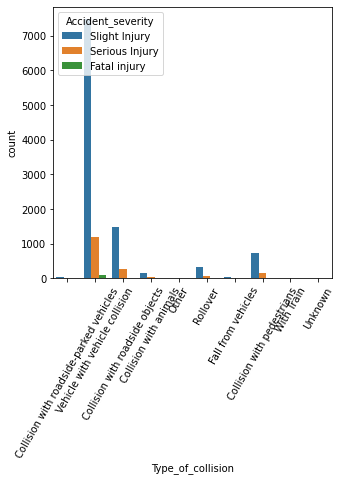

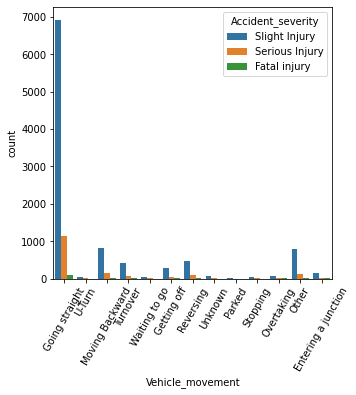

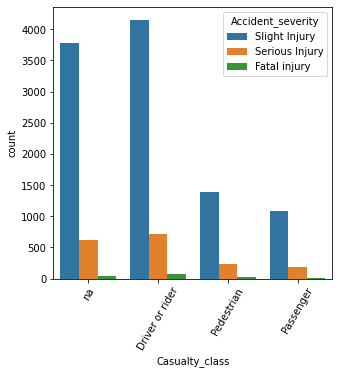

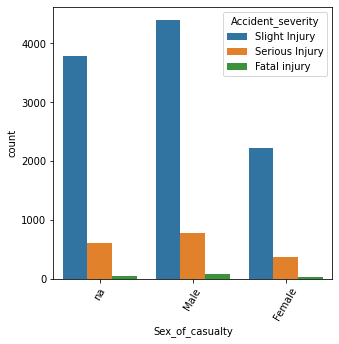

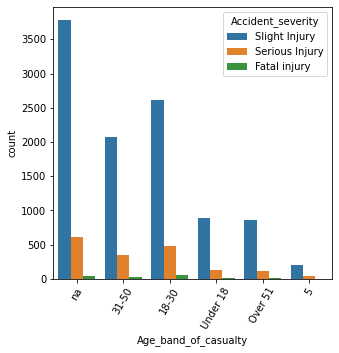

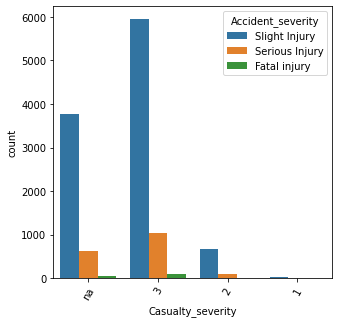

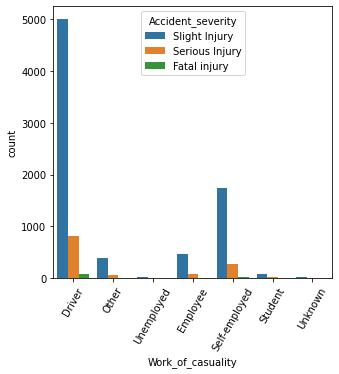

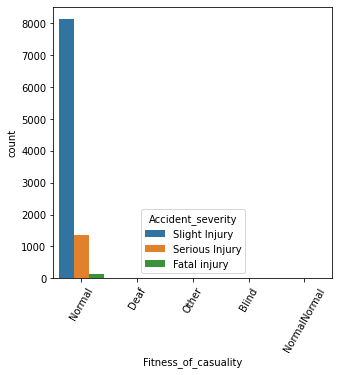

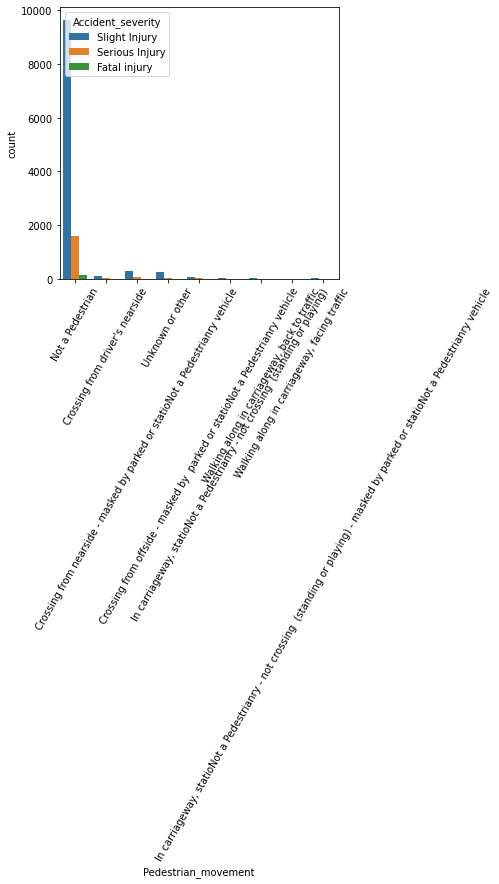

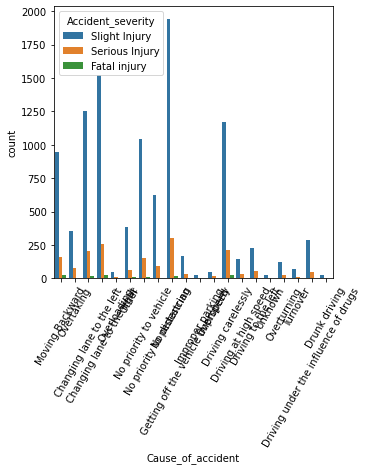

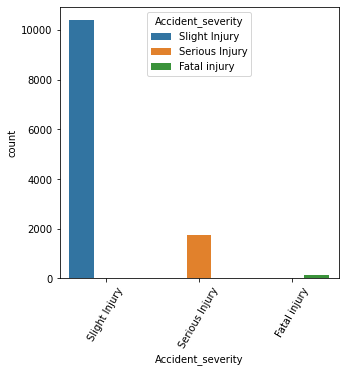

In [97]:
# data visualizationf of categorical cols

def count_plot(col):
    n_df[col].value_counts()
    
    # plot the figure of count plot
    plt.figure(figsize=(5,5))
    sns.countplot(x=col, hue='Accident_severity', data=n_df)
    plt.xlabel(f'{col}')
    plt.xticks(rotation=60)
    plt.show
    
for col in obj_cols:
    count_plot(col)

<Figure size 360x360 with 0 Axes>

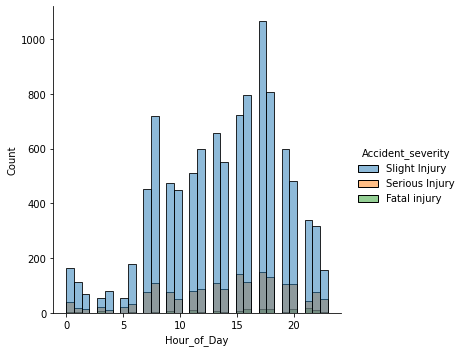

In [98]:
# disribution of hour of the day
plt.figure(figsize=(5,5))
sns.displot(x='Hour_of_Day', hue='Accident_severity', data=n_df)
plt.show()

# Data pre-processing

In [99]:
# feature selection based on visualization (to_be_continue)
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']
len(features)

17

In [100]:
# new dataframe generated
featureset_df = n_df[features]
target = n_df['Accident_severity']

In [101]:
# meta data of the new sub dataset
featureset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12077 non-null  object
 4   Types_of_Junction            11429 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            11575 non-null  object
 8   Vehicle_driver_relation      11737 non-null  object
 9   Type_of_vehicle              11366 non-null  object
 10  Driving_experience           11487 non-null  object
 11  Service_year_of_vehicle      8388 non-null   object
 12  Type_of_collision            12161 non-null  object
 13  Sex_of_casualty              12

#Missing value treatment

In [102]:
feature_df = featureset_df.copy()

Missing value approch


*   Most the missing values in features could be result of non-availability during investigation of the accident site, hence we will replace it as a 'Unknown' in all the columns in this case.



In [103]:
# NaN are missing because service info might not be available, we will fill as 'Unknowns'
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Other')
feature_df['Vehicle_driver_relation'] = feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')

In [104]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12316 non-null  object
 4   Types_of_Junction            12316 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            12316 non-null  object
 8   Vehicle_driver_relation      12316 non-null  object
 9   Type_of_vehicle              12316 non-null  object
 10  Driving_experience           12316 non-null  object
 11  Service_year_of_vehicle      12316 non-null  object
 12  Type_of_collision            12316 non-null  object
 13  Sex_of_casualty              12

#One Hot Encoding

One-hot encoding to encode categorical features and LabelEncoder() to encode the labels

In [105]:
X = feature_df[features]
y = target

In [106]:
# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(12316, 106)

#Lable encoding of Target Feature

In [107]:
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)

Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


# 1: serious injury, 2: Slight injury, 0: Fatal Injury

#Feature selection using k best chi2 method

In [108]:
## mutual info classif to check informative features
mi_calc = mutual_info_classif(encoded_df, y_en, random_state=42)

In [109]:
mi_df = pd.DataFrame({'Columns':encoded_df.columns, 'MI_score':mi_calc})
mi_df.sort_values(by='MI_score',ascending=False).head(15)

,Columns,MI_score
1,Number_of_casualties,0.013536
0,Number_of_vehicles_involved,0.013173
2,Hour_of_Day,0.006631
46,Type_of_vehicle_Long lorry,0.006190
69,Service_year_of_vehicle_Below 1yr,0.005561
11,Area_accident_occured_ Hospital areas,0.005223
28,Types_of_Junction_Y Shape,0.005065
61,Driving_experience_5-10yr,0.004813
26,Types_of_Junction_Unknown,0.004679
104,Cause_of_accident_Turnover,0.004536


In [110]:
# feature seleciton method using chi2 for categorical output, categorical input
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)
X_new.shape
cols = fs.get_feature_names_out()

In [111]:

fs_df = pd.DataFrame(X_new, columns=cols)

#PCA

In [112]:
pca = PCA(n_components=3)
pca.fit(encoded_df)

X_pca = pca.transform(encoded_df)

# 3 components PCA algorithm
components = pca.components_

pca_df = pd.DataFrame(X_pca, columns={'PC1','PC2','PC3'})
pca_df.var()

PC2    27.074680
PC1     1.054314
PC3     0.630354
dtype: float64

#Imbalance data treatment

In [113]:
# categorical features for SMOTENC technique for categorical features
n_cat_index = np.array(range(3,50))

smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_n, y_n = smote.fit_resample(fs_df,y_en)
X_n.shape, y_n.shape

((31245, 50), (31245,))

In [114]:
y_n.value_counts()

2    10415
1    10415
0    10415
dtype: int64

#Modelling baseline and hyper parameter tuning

In [115]:
# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)
# predicting on test data
predics = rf.predict(X_tst)

In [116]:
# train score 
rf.score(X_trn, y_trn)

0.9416306609057449

In [117]:
classif_re = classification_report(y_tst,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2085
           1       0.84      0.83      0.84      2100
           2       0.86      0.87      0.86      2064

    accuracy                           0.88      6249
   macro avg       0.88      0.88      0.88      6249
weighted avg       0.88      0.88      0.88      6249



In [118]:
conf_matrix = confusion_matrix(y_tst, predics)
conf_matrix

array([[2000,   66,   19],
       [  97, 1738,  265],
       [  21,  256, 1787]])

In [119]:
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

0.8838187418909502


#Modeling for deployment on streamlit cloud

In [120]:
# encoder categorical features
cat_fea_df = feature_df.drop(['Hour_of_Day','Number_of_vehicles_involved','Number_of_casualties'], axis=1)

oencoder = OrdinalEncoder()
encoded_df2 = pd.DataFrame(oencoder.fit_transform(cat_fea_df))
encoded_df2.columns = cat_fea_df.columns

In [121]:
new_fea_df = feature_df[['Type_of_collision','Age_band_of_driver','Sex_of_driver',
       'Educational_level','Service_year_of_vehicle','Day_of_week','Area_accident_occured']]

oencoder2 = OrdinalEncoder()
encoded_df3 = pd.DataFrame(oencoder2.fit_transform(new_fea_df))
encoded_df3.columns = new_fea_df.columns

In [122]:
oencoder2.transform(new_fea_df.iloc[0:1,:]).reshape(1,-1)
#np.array(new_fea_df.iloc[0,:],ndmin=2)

array([[3., 0., 1., 0., 3., 1., 9.]])

In [123]:
# save the encoder
joblib.dump(oencoder, "ordinal_encoder.joblib")

['ordinal_encoder.joblib']

In [124]:

joblib.dump(oencoder2, "ordinal_encoder2.joblib")

['ordinal_encoder2.joblib']

In [125]:
final_df = pd.concat([encoded_df2,feature_df[['Hour_of_Day','Number_of_vehicles_involved','Number_of_casualties']]], axis=1)
final_df.head()

,Day_of_week,Area_accident_occured,Types_of_Junction,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Type_of_vehicle,Driving_experience,Service_year_of_vehicle,Type_of_collision,Sex_of_casualty,Age_band_of_casualty,Cause_of_accident,Hour_of_Day,Number_of_vehicles_involved,Number_of_casualties
0,1.0,9.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,5.0,9.0,17,2,2
1,1.0,6.0,1.0,1.0,1.0,4.0,0.0,11.0,3.0,2.0,8.0,2.0,5.0,16.0,17,2,2
2,1.0,1.0,1.0,0.0,1.0,4.0,0.0,5.0,0.0,5.0,2.0,1.0,1.0,0.0,17,2,2
3,3.0,6.0,7.0,0.0,1.0,4.0,0.0,11.0,2.0,5.0,8.0,0.0,0.0,1.0,1,2,2
4,3.0,4.0,7.0,0.0,1.0,4.0,0.0,7.0,1.0,2.0,8.0,2.0,5.0,16.0,1,2,2


In [126]:
## mutual info classif to check informative features
mi_calc2 = mutual_info_classif(final_df, y_en, random_state=42)
mi_df2 = pd.DataFrame({'Columns':final_df.columns, 'MI_score':mi_calc2})
mi_df2_sorted = mi_df2.sort_values(by='MI_score',ascending=False)
mi_df2_sorted

,Columns,MI_score
15,Number_of_vehicles_involved,0.015022
16,Number_of_casualties,0.008018
14,Hour_of_Day,0.004011
10,Type_of_collision,0.003904
3,Age_band_of_driver,0.002889
4,Sex_of_driver,0.002828
5,Educational_level,0.001399
9,Service_year_of_vehicle,0.001261
0,Day_of_week,0.000531
1,Area_accident_occured,0.000190


In [127]:
# we will remove features with mi_Score of zero and keep only first top10 most significant features
cols_list = list(mi_df2_sorted['Columns'][:10])
final_df2 = final_df[cols_list]

In [128]:
s_final_df = pd.concat([feature_df[['Number_of_vehicles_involved','Number_of_casualties','Hour_of_Day']],encoded_df3], axis=1)
s_final_df.head()

,Number_of_vehicles_involved,Number_of_casualties,Hour_of_Day,Type_of_collision,Age_band_of_driver,Sex_of_driver,Educational_level,Service_year_of_vehicle,Day_of_week,Area_accident_occured
0,2,2,17,3.0,0.0,1.0,0.0,3.0,1.0,9.0
1,2,2,17,8.0,1.0,1.0,4.0,2.0,1.0,6.0
2,2,2,17,2.0,0.0,1.0,4.0,5.0,1.0,1.0
3,2,2,1,8.0,0.0,1.0,4.0,5.0,3.0,6.0
4,2,2,1,8.0,0.0,1.0,4.0,2.0,3.0,4.0


In [129]:
# train and test split and building baseline model to predict target features
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(s_final_df, y_en, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=700, max_depth=20, random_state=42)
rf.fit(X_trn2, y_trn2)
# predicting on test data
predics2 = rf.predict(X_tst2)

In [130]:

X_trn2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9852 entries, 6571 to 7270
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_vehicles_involved  9852 non-null   int64  
 1   Number_of_casualties         9852 non-null   int64  
 2   Hour_of_Day                  9852 non-null   int64  
 3   Type_of_collision            9852 non-null   float64
 4   Age_band_of_driver           9852 non-null   float64
 5   Sex_of_driver                9852 non-null   float64
 6   Educational_level            9852 non-null   float64
 7   Service_year_of_vehicle      9852 non-null   float64
 8   Day_of_week                  9852 non-null   float64
 9   Area_accident_occured        9852 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 846.7 KB


In [131]:
newd = X_tst2.sample(10)
sampl_arr = np.array(newd.iloc[0]).reshape(1,-1)
sampl_arr

array([[ 2.,  1., 13.,  8.,  2.,  1.,  5.,  2.,  4.,  7.]])

In [132]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [133]:
import shap

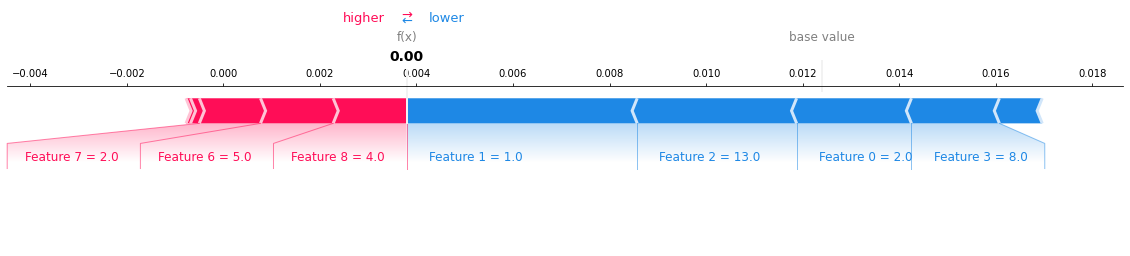

In [134]:
shap.initjs()
shap_values = shap.TreeExplainer(rf).shap_values(sampl_arr)
shap.force_plot(shap.TreeExplainer(rf).expected_value[0], shap_values[0], sampl_arr, matplotlib=True,show=False)
plt.savefig("pred_force_plot1.png")

In [135]:
img = Image.open("/content/pred_force_plot1.png")
type(img)

PIL.PngImagePlugin.PngImageFile

In [136]:
classif_re2 = classification_report(y_tst2,predics2)
print(classif_re2)

              precision    recall  f1-score   support

           0       1.00      0.16      0.28        37
           1       0.67      0.12      0.21       363
           2       0.85      0.99      0.92      2064

    accuracy                           0.85      2464
   macro avg       0.84      0.42      0.47      2464
weighted avg       0.83      0.85      0.80      2464



In [137]:
f1score2 = f1_score(y_tst2,predics2, average='weighted')
print(f1score2)

0.8025181469609676


In [138]:
# save the model
joblib.dump(rf, "rta_model_deploy3.joblib", compress=9)

['rta_model_deploy3.joblib']

In [139]:
# import all the app dependencies
import pandas as pd
import numpy as np
import sklearn
!pip install streamlit
import streamlit as st
import joblib
import shap
import matplotlib
from IPython import get_ipython
from PIL import Image

# load the encoder and model object
model = joblib.load("rta_model_deploy3.joblib")
encoder = joblib.load("ordinal_encoder2.joblib")

st.set_option('deprecation.showPyplotGlobalUse', False)

# 1: serious injury, 2: Slight injury, 0: Fatal Injury

st.set_page_config(page_title="Accident Severity Prediction App",
                page_icon="🚧", layout="wide")

#creating option list for dropdown menu
options_day = ['Sunday', "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
options_age = ['18-30', '31-50', 'Over 51', 'Unknown', 'Under 18']

# number of vehical involved: range of 1 to 7
# number of casualties: range of 1 to 8
# hour of the day: range of 0 to 23

options_types_collision = ['Vehicle with vehicle collision','Collision with roadside objects',
                           'Collision with pedestrians','Rollover','Collision with animals',
                           'Unknown','Collision with roadside-parked vehicles','Fall from vehicles',
                           'Other','With Train']

options_sex = ['Male','Female','Unknown']

options_education_level = ['Junior high school','Elementary school','High school',
                           'Unknown','Above high school','Writing & reading','Illiterate']

options_services_year = ['Unknown','2-5yrs','Above 10yr','5-10yrs','1-2yr','Below 1yr']

options_acc_area = ['Other', 'Office areas', 'Residential areas', ' Church areas',
       ' Industrial areas', 'School areas', '  Recreational areas',
       ' Outside rural areas', ' Hospital areas', '  Market areas',
       'Rural village areas', 'Unknown', 'Rural village areasOffice areas',
       'Recreational areas']

# features list
features = ['Number_of_vehicles_involved','Number_of_casualties','Hour_of_Day','Type_of_collision','Age_band_of_driver','Sex_of_driver',
       'Educational_level','Service_year_of_vehicle','Day_of_week','Area_accident_occured']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
# Give a title to web app using html syntax
st.markdown("Accident Severity Prediction App 🚧", unsafe_allow_html=True)

def main():
    with st.form("road_traffic_severity_form"):
        st.subheader("Please enter the following inputs:")
        No_vehicles = st.slider("Number of vehicles involved:",1,7, value=0, format="%d")
        No_casualties = st.slider("Number of casualties:",1,8, value=0, format="%d")
        Hour = st.slider("Hour of the day:", 0, 23, value=0, format="%d")
        collision = st.selectbox("Type of collision:",options=options_types_collision)
        Age_band = st.selectbox("Driver age group?:", options=options_age)
        Sex = st.selectbox("Sex of the driver:", options=options_sex)
        Education = st.selectbox("Education of driver:",options=options_education_level)
        service_vehicle = st.selectbox("Service year of vehicle:", options=options_services_year)
        Day_week = st.selectbox("Day of the week:", options=options_day)
        Accident_area = st.selectbox("Area of accident:", options=options_acc_area)
        
        submit = st.form_submit_button("Predict")
    
    if submit:
        input_array = np.array([collision,
                                Age_band,Sex,Education,service_vehicle,
                                Day_week,Accident_area], ndmin=2)
        
        encoded_arr = list(encoder.transform(input_array).ravel())
        
        num_arr = [No_vehicles,No_casualties,Hour]
        pred_arr = np.array(num_arr + encoded_arr).reshape(1,-1)
    
        prediction = model.predict(pred_arr)
        
        if prediction == 0:
            st.write(f"The severity prediction is Fatal Injury⚠")
        elif prediction == 1:
            st.write(f"The severity prediction is serious injury")
        else:
            st.write(f"The severity prediction is slight injury")
        
        st.subheader("Explainable AI (XAI) to understand predictions")
        shap.initjs()
        shap_values = shap.TreeExplainer(model).shap_values(pred_arr)
        st.write(f"For prediction {prediction}") 
        shap.force_plot(shap.TreeExplainer(model).expected_value[0], shap_values[0],pred_arr, feature_names=features, matplotlib=True,show=False).savefig("pred_force_plot.jpg", bbox_inches='tight')
        img = Image.open("pred_force_plot1.jpg")
        
        st.image(img, caption='Model explanation using shap')
        
        st.write("Developed By: Avi Kumar Talaviya")
        st.markdown("""Reach out to me on
 [Twitter](https://twitter.com/avikumart_) |
              [Linkedin](https://www.linkedin.com/in/avi-kumar-talaviya-739153147/) |
              [Kaggle](https://www.kaggle.com/avikumart)""")

  command:

    streamlit run /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2023-02-05 19:25:34.461 
  command:

    streamlit run /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [151]:
a,b,c = st.columns([0.2,0.6,0.2])
with b:
  st.image("vllkyt19n98psusds8.jpg", use_column_width=True)


# description about the project and code files            
st.subheader("🧾Description:")
st.text("""This data set is collected from Addis Ababa Sub-city police departments for master's research work. 
The data set was prepared from manual documents of road traffic accidents of the year 2017-20. 
All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident.
Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms.
""")

st.markdown("Source of the dataset: [Click Here](https://www.narcis.nl/dataset/RecordID/oai%3Aeasy.dans.knaw.nl%3Aeasy-dataset%3A191591)")

st.subheader("🧭 Problem Statement:")
st.text("""The target feature is Accident_severity which is a multi-class variable. 
The task is to classify this variable based on the other 31 features step-by-step by going through each day's task. 
The metric for evaluation will be f1-score
""")

st.markdown("Please find GitHub repository link of project: [Click Here](https://github.com/avikumart/Road-Traffic-Severity-Classification-Project)")                  
   
# run the main function               
if __name__ == '__main__':
   main()

RuntimeError: ignored